# Kraków: How to get all the metrics

### Setup

In [1]:
import matplotlib.pyplot as plt
import geopandas as gpd
import momepy
import osmnx

In [2]:
krakow_bbox_gdf = gpd.read_file("../data/nw_krakow_bbox.geojson")
polygon = krakow_bbox_gdf.iloc[0].geometry

In [3]:
CRS_POLAND_1992 = "EPSG:2180"

# Metrics

## Polygon - Building footprints

In [4]:
raw_buildings_data = osmnx.geometries.geometries_from_polygon(polygon, tags={'building':True})

In [5]:
buildings = raw_buildings_data[:]

In [6]:
buildings["geometry"].geom_type.unique()

array(['Point', 'Polygon', 'MultiPolygon'], dtype=object)

In [7]:
buildings = buildings[buildings["geometry"].geom_type.isin(["Polygon", "MultiPolygon"])]

In [8]:
buildings.to_crs(CRS_POLAND_1992, inplace=True)

### Visualize

In [9]:
def large_plot(gdf):
    f, ax = plt.subplots(figsize=(15, 15))
    gdf.plot(ax=ax, color='blue', alpha=.5)
    ax.set_axis_off()
    plt.show()

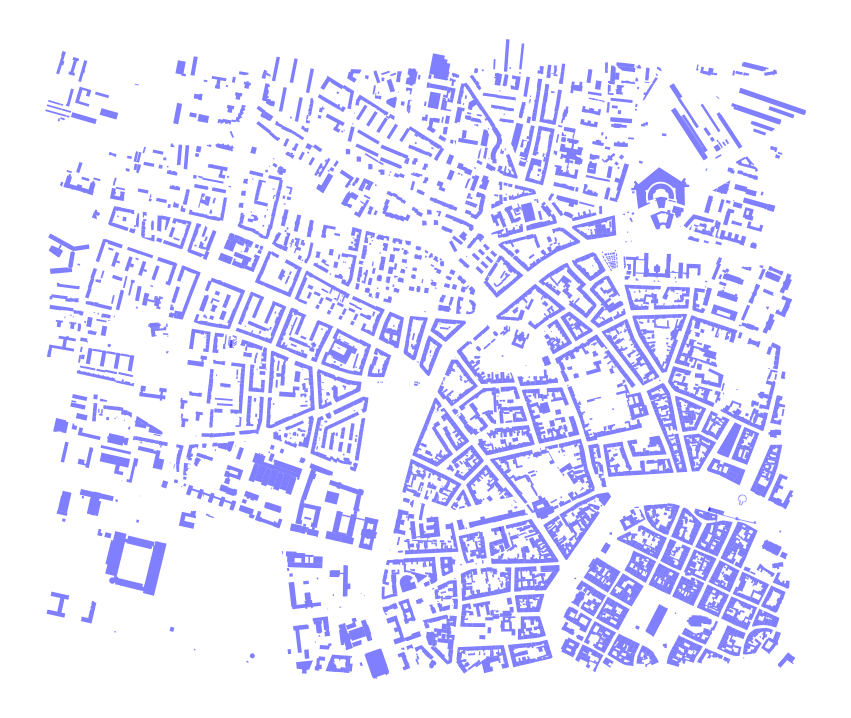

In [10]:
large_plot(buildings)

### Area

In [11]:
buildings["area"] = momepy.Area(buildings).series

In [12]:
def large_plot_column(gdf, column, k=6):
    f, ax = plt.subplots(figsize=(10, 10))
    gdf.plot(ax=ax, column=column, legend=True, scheme='quantiles', k=k, cmap='viridis')
    ax.set_axis_off()
    plt.show()

/Users/Filip/code/python/miniconda3/envs/momepy/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


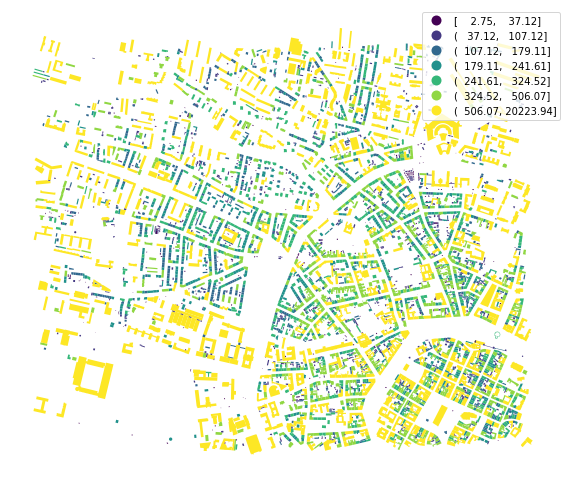

In [13]:
large_plot_column(buildings, "area", k=7)

### Height

In [14]:
buildings["has_height"] = buildings["height"].notnull()

/Users/Filip/code/python/miniconda3/envs/momepy/lib/python3.7/site-packages/mapclassify/classifiers.py:236: UserWarning: Warning: Not enough unique values in array to form k classes
  "Warning: Not enough unique values in array to form k classes", UserWarning
/Users/Filip/code/python/miniconda3/envs/momepy/lib/python3.7/site-packages/mapclassify/classifiers.py:238: UserWarning: Warning: setting k to 2
  Warn("Warning: setting k to %d" % k_q, UserWarning)


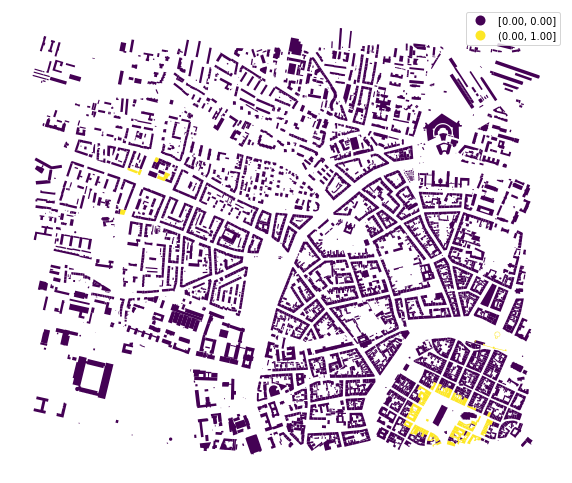

In [15]:
large_plot_column(buildings, "has_height")

Height enables:
* Volume  
* VolumeFacadeRatio
* FloorArea (assumes that each floor is 3m of height)   
* StreetProfile

see: http://docs.momepy.org/en/stable/api.html#dimension

### Floors

In [16]:
buildings["has_levels"] = buildings['building:levels'].notnull()

/Users/Filip/code/python/miniconda3/envs/momepy/lib/python3.7/site-packages/mapclassify/classifiers.py:236: UserWarning: Warning: Not enough unique values in array to form k classes
  "Warning: Not enough unique values in array to form k classes", UserWarning
/Users/Filip/code/python/miniconda3/envs/momepy/lib/python3.7/site-packages/mapclassify/classifiers.py:238: UserWarning: Warning: setting k to 2
  Warn("Warning: setting k to %d" % k_q, UserWarning)


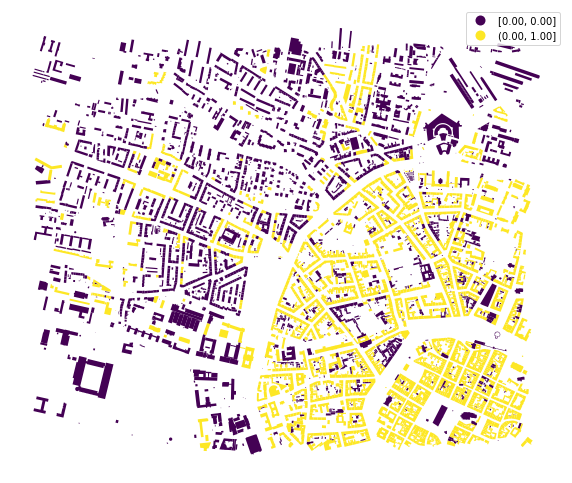

In [17]:
large_plot_column(buildings, "has_levels")

In [18]:
buildings["building:levels"].replace("3;2", "3", inplace=True)

In [19]:
buildings[buildings["building:levels"] == "3;2"]

,unique_id,osmid,element_type,building,name,note,geometry,addr:city,addr:country,addr:housenumber,...,ways,type,castle_type,owner,community,community:gender,community:pl,area,has_height,has_levels


In [20]:
buildings["building:levels"] = buildings["building:levels"].astype(float)

In [21]:
buildings['building:levels'].describe()

count    1848.000000
mean        3.530844
std         1.392656
min         0.000000
25%         3.000000
50%         3.000000
75%         4.000000
max        17.000000
Name: building:levels, dtype: float64

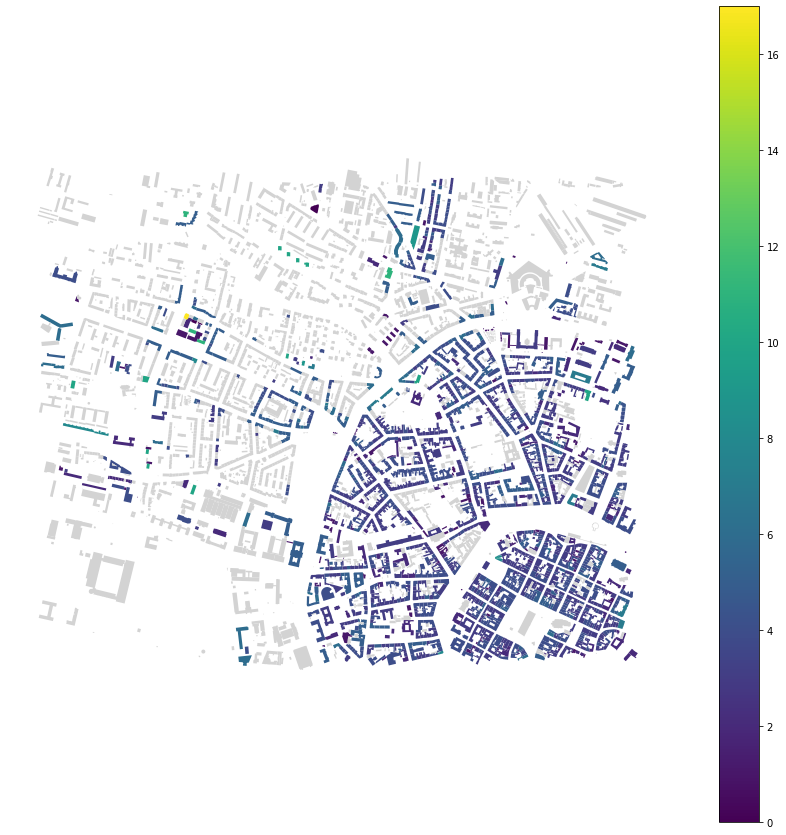

In [22]:
f, ax = plt.subplots(figsize=(15, 15))
buildings.plot(ax=ax, column='building:levels', legend=True, cmap='viridis', missing_kwds={'color': 'lightgrey'})
ax.set_axis_off()
plt.show()

### Tesselation
http://docs.momepy.org/en/stable/generated/momepy.Tessellation.html#momepy-tessellation

* Use momepy.CheckTessellationInput to verify input

In [23]:
check = momepy.CheckTessellationInput(buildings)

Collapsed features  : 0
Split features      : 20
Overlapping features: 15


<AxesSubplot:>

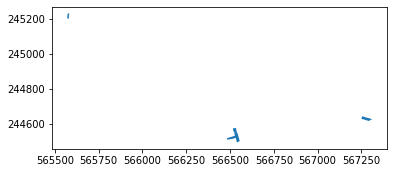

In [24]:
check.overlap.plot()

In [26]:
buildings["uID"] = momepy.unique_id(buildings)

In [31]:
buildings.sort_values('area', ascending=True)

,unique_id,osmid,element_type,building,name,note,geometry,addr:city,addr:country,addr:housenumber,...,type,castle_type,owner,community,community:gender,community:pl,area,has_height,has_levels,uID
4337,way/694071611,694071611,way,yes,NaN,NaN,"POLYGON ((565375.047 244779.252, 565376.463 24...",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.749093,False,False,4329
3567,way/377437731,377437731,way,service,NaN,NaN,"POLYGON ((566949.266 244885.769, 566950.987 24...",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.884349,False,True,3559
4394,way/703190113,703190113,way,yes,NaN,NaN,"POLYGON ((566949.184 245671.978, 566950.929 24...",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.979314,False,False,4386
3751,way/692388788,692388788,way,yes,NaN,NaN,"POLYGON ((566392.538 244763.901, 566393.531 24...",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3.044706,False,False,3743
4263,way/693617226,693617226,way,yes,NaN,NaN,"POLYGON ((566817.673 244935.882, 566818.678 24...",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3.051137,False,False,4255
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2612,way/233355695,233355695,way,yes,NaN,NaN,"POLYGON ((566341.107 246172.295, 566344.133 24...",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,5016.774660,False,False,2604
1471,way/231815729,231815729,way,hall,Muzeum Narodowe w Krakowie,NaN,"POLYGON ((566045.182 244126.292, 566048.973 24...",Kraków,PL,1,...,NaN,NaN,NaN,NaN,NaN,NaN,5713.829382,False,False,1463
2500,way/233355485,233355485,way,hospital,NaN,NaN,"POLYGON ((566712.233 245839.590, 566713.418 24...",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,6904.288555,False,False,2492
3202,way/233356837,233356837,way,fort,NaN,NaN,"POLYGON ((566981.640 245761.352, 566982.802 24...",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,10581.809091,False,False,3194
